In [2]:
#calculations
from __future__ import division
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA

#plotting and debugging
import matplotlib.pyplot as plt
import pdb

In [3]:
#import custom functions
#harmonic is assignment function
#sol_frame indexes array same as matlab

from harmonic import *
from sol_frame import *

In [22]:
#define constants
tol = 10**-4
k = 1
L=4
xp = [-L,L]
A = 0.5 #initial derivative of function (a guess)

En_start = k
En = En_start

# Pack up the parameters and initial conditions:
p = [k, En]

#initial conditions
val = A
slope = A*np.sqrt(k*L**2 - En) 
#y0 = [0, A]
y0 = [val, slope]


#define x range for eig_funct
dx = 0.1
x_frame = sol_frame(xp[0], xp[1], dx)

eig_funct = []
eig_vals = []

for i in range(1,6):
    dEn = k/100
    En = En + dEn
    #loop through and find solution
    for j in range(1, 1000):

        #reset En
        p = [k, En]
        
        #reset initial conditions
        val = A
        slope = A*np.sqrt(k*L**2 - En) 
        y0 = [val , slope]

        
        #solve ODE
        sol = integrate.odeint(harmonic, y0, x_frame, args=(p,))
        
        #pull end value
        end = len(sol)
        end_val = sol[end-1:end, 0:1]

        #check if solution is within tolerance
        if (abs(end_val - val)) < tol:
            En
            #print('found solution on iteration:')
            #print j
            break;

        if i % 2 == 0:
            if (end_val - val) < 0:
                En = En+dEn
            else:
                En = En-dEn/2
                dEn = dEn/2
        else:
            if (end_val - val) > 0:
                En = En+dEn
            else:
                En = En-dEn/2
                dEn = dEn/2
                
    y1a = sol[:,0:1]
    y2a = sol[:,1:2]
    
    #append eigen function to list
    eig_funct.append(y1a)
    #append Eigen value
    eig_vals.append(En)

In [23]:
#write out solution of asbsolute value eigen funtions
A1 = abs(eig_funct[0])
A1 = A1 / np.trapz(A1, axis=-0, dx=dx)
np.savetxt('A1.dat', A1)

A2 = abs(eig_funct[1])
A2 = A2 / np.trapz(A2, axis=-0, dx=dx)
np.savetxt('A2.dat', A2)

A3 = abs(eig_funct[2])
A3 = A3 / np.trapz(A3, axis=-0, dx=dx)
np.savetxt('A3.dat', A3)

A4 = abs(eig_funct[3])
A4 = A4 / np.trapz(A4, axis=-0, dx=dx)
np.savetxt('A4.dat', A4)

A5 = abs(eig_funct[4])
A5 = A5 / np.trapz(A5, axis=-0, dx=dx)
np.savetxt('A5.dat', A5)

In [24]:
eig1 = eig_vals[0] #/ np.trapz(A1, axis=-0, dx=dx)
eig2 = eig_vals[1] #/ np.trapz(A2, axis=-0, dx=dx)
eig3 = eig_vals[2] #/ np.trapz(A3, axis=-0, dx=dx)
eig4 = eig_vals[3] #/ np.trapz(A4, axis=-0, dx=dx)
eig5 = eig_vals[4] #/ np.trapz(A5, axis=-0, dx=dx)

In [25]:
A6 = np.r_[eig1,eig2,eig3,eig4,eig5]
np.savetxt('A6.dat', A6)

### Plots

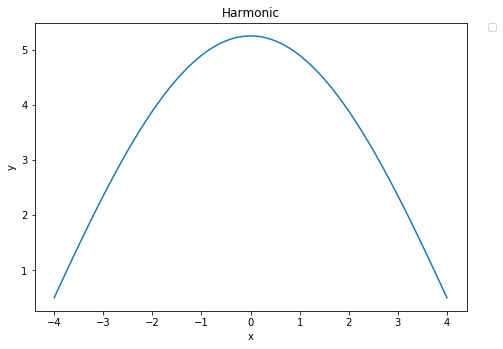

In [33]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[0], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

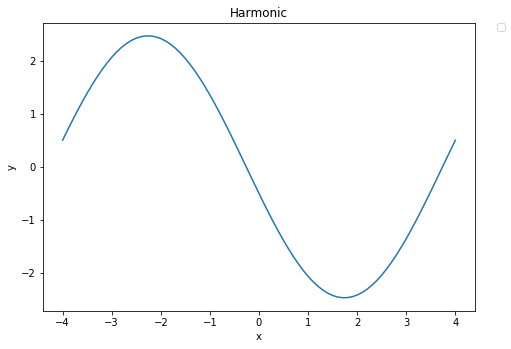

In [34]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[1], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

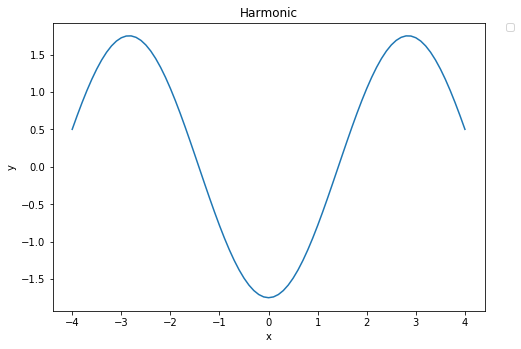

In [35]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[2], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

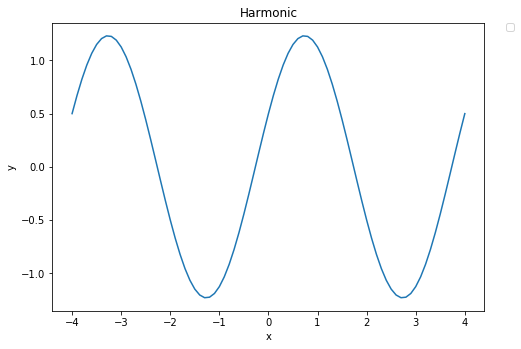

In [36]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[3], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

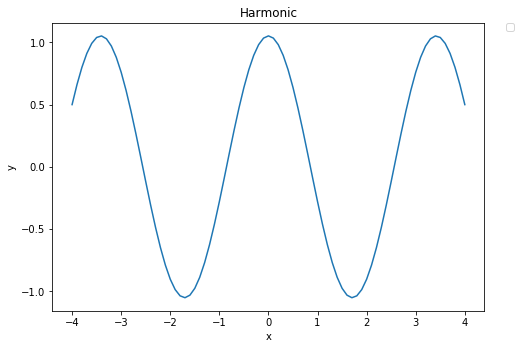

In [37]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(x_frame, eig_funct[4], label = '')
#ax.plot(x_frame,y2a, label = '')

#title axis
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Harmonic')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()